data : Orthogonal Frequency Division Multiplexing (OFDM)
len of data: 49
tx bits:  [0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1

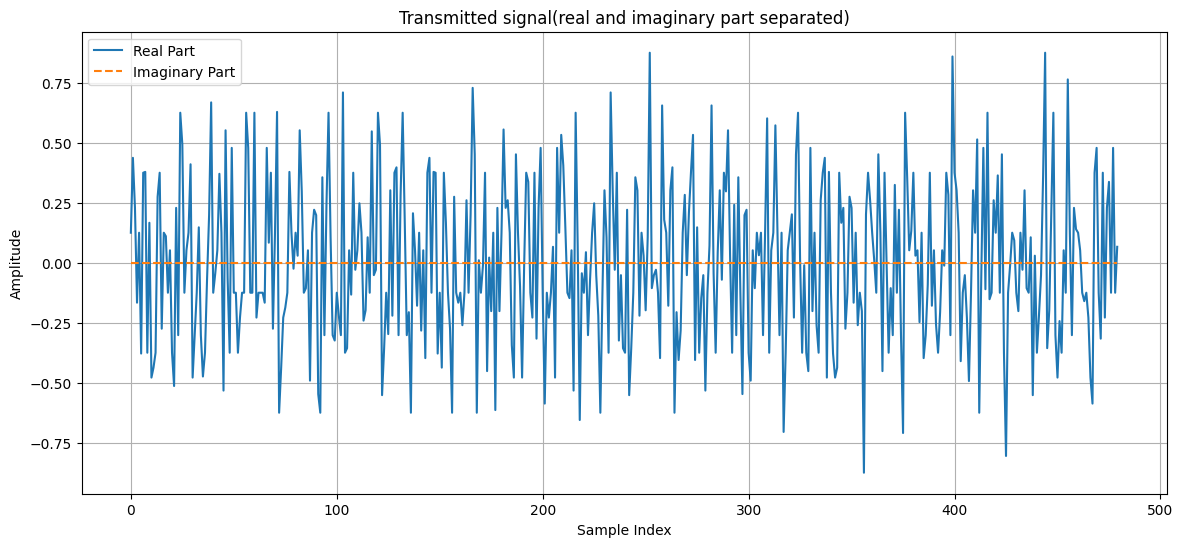

transmitted signal clipped [[12.42156742 17.42156742 14.49263523  6.59201401 12.42156742  2.35321869
  17.42156742 17.42156742  2.42156742 13.25112082  0.3504996   1.18005301
   2.42156742 15.41884833 17.42156742  4.4242865  12.42156742 12.130267
   7.42156742 10.95710132  2.42156742  0.         14.49263523  3.88603351
  17.42156742 17.42156742  7.42156742 10.95710132 12.42156742 17.42156742
   0.3504996   3.88603351  7.42156742 12.87051848  3.88603351  0.43980152
   2.42156742  8.50543117 13.88603351 17.42156742  7.42156742  9.04368416
  10.95710132 17.3322655  12.42156742  0.         17.42156742  8.63172316
   2.42156742 17.42156742  7.42156742  7.42156742  2.42156742  5.3504996
   7.42156742  7.42156742 17.42156742 17.42156742  7.42156742  7.42156742
  17.42156742  5.3504996   7.42156742  7.42156742  7.42156742  6.59201401
  17.42156742 11.59201401 17.42156742  4.4242865  12.42156742 17.42156742
   0.          1.18005301  5.3504996   6.18005301  7.42156742 17.42156742
  12.42156742 

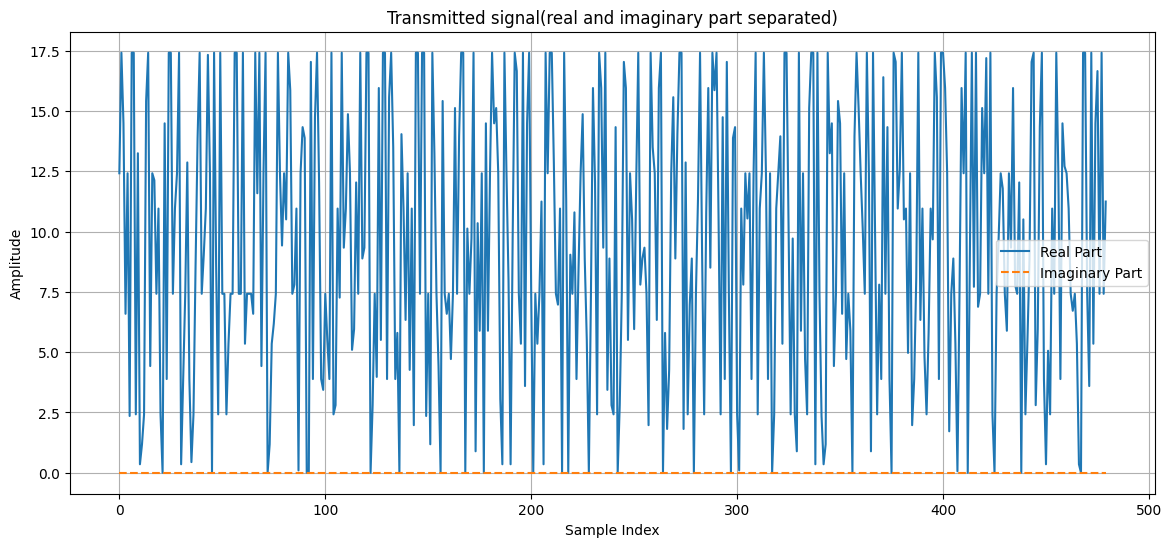

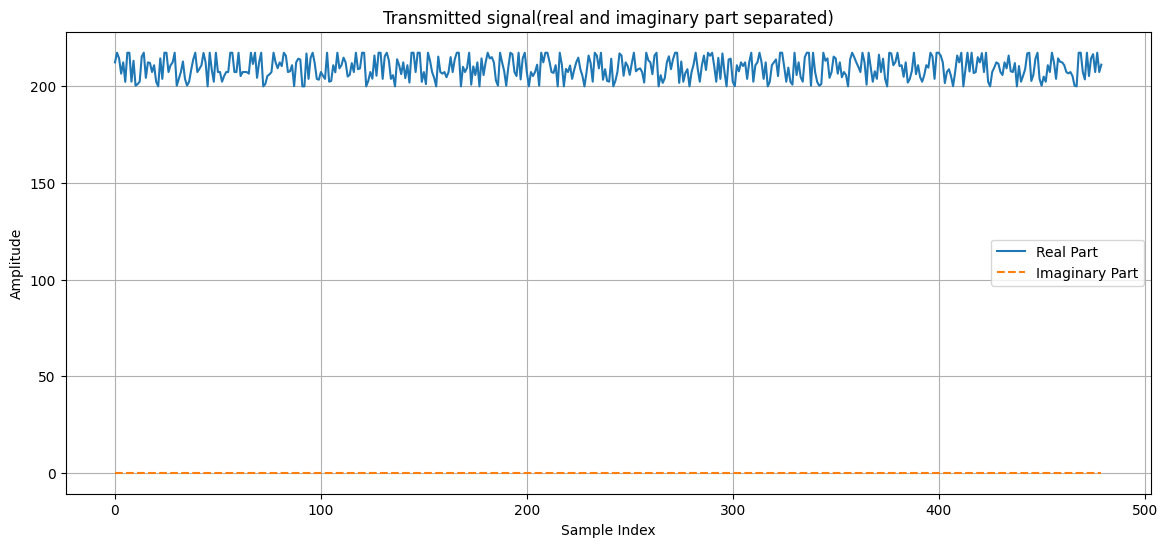

In [1]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import reedsolo

def string_to_bits(s):
    """Convert a string to a list of bits."""
    return list(itertools.chain.from_iterable([list(map(int, f"{ord(c):08b}")) for c in s]))

# def bits_to_string(bits):
#     """Convert a list of bits back to a string."""
#     chars = [chr(int(''.join(map(str, bits[i:i + 8])), 2)) for i in range(0, len(bits), 8)]
#     return ''.join(chars)

def binary_to_bytes(binary_str):
    """Convert a binary string to bytes."""
    byte_array = bytearray()
    for i in range(0, len(binary_str), 8):
        byte_array.append(int(binary_str[i:i+8], 2))
    return bytes(byte_array)

def bytes_to_binary(byte_array):
    """Convert bytes to a binary string."""
    return ''.join(f'{byte:08b}' for byte in byte_array)

def binary_to_qam16(bits):
    """Convert a binary list to QAM-16 symbols."""
    M = 4  # QAM-16
    bits_per_symbol = int(np.log2(M))  # 4 bits per QAM-16 symbol
    
    # Ensure the stream length is a multiple of bits_per_symbol (4 for QAM-16)
    pad_length = (bits_per_symbol - len(bits) % bits_per_symbol) % bits_per_symbol
    padded_bits = np.append(bits, [0] * pad_length)

    # # QAM-16 mapping
    # mapping = {
    #     '0000': -3-3j, '0001': -3-1j, '0010': -3+3j, '0011': -3+1j,
    #     '0100': -1-3j, '0101': -1-1j, '0110': -1+3j, '0111': -1+1j,
    #     '1000':  3-3j, '1001':  3-1j, '1010':  3+3j, '1011':  3+1j,
    #     '1100':  1-3j, '1101':  1-1j, '1110':  1+3j, '1111':  1+1j
    # }
    
    mapping = {
        '00':  1+1j,  # Symbol 1
        '01':  1-1j,  # Symbol 2
        '11': -1-1j,  # Symbol 3
        '10': -1+1j   # Symbol 4
    }

    symbols = []
    # Convert each group of 4 bits to a QAM-16 symbol
    for i in range(0, len(padded_bits), bits_per_symbol):
        bit_group = ''.join(str(int(bit)) for bit in padded_bits[i:i+bits_per_symbol])
        symbols.append(mapping[bit_group])

    return np.array(symbols)

def hermitian_symmetry(symbols):
    """Apply Hermitian symmetry to generate a 16-subcarrier OFDM symbol."""
    N = 16  # Number of subcarriers
    hermitian_symmetric = np.zeros(N, dtype=complex)  # Initialize the output array
    
    # Assign QAM symbols to the subcarriers according to the specified order
    hermitian_symmetric[1:8] = symbols[0:7]  # Subcarrier 2 to 8
    hermitian_symmetric[8] = 0  # Nyquist frequency (Subcarrier 9) is set to 0
    hermitian_symmetric[9] = np.conj(symbols[6])  # Subcarrier 10 is the conjugate of Subcarrier 8
    hermitian_symmetric[10:15] = np.conj(symbols[1:6])[::-1]  # Subcarrier 11 to 15 are conjugate and reversed
    hermitian_symmetric[15] = np.conj(symbols[0])  # Subcarrier 16 is the conjugate of Subcarrier 2

    return hermitian_symmetric

def create_ofdm_symbols(qam_symbols, num_subcarriers=16, symbols_per_ofdm=7):
    """Create OFDM symbols with Hermitian symmetry."""
    num_ofdm_symbols = len(qam_symbols) // symbols_per_ofdm  # Number of OFDM symbols
    ofdm_symbols = []  # List to hold the time-domain OFDM symbols
    
    for i in range(num_ofdm_symbols):
        # Extract the relevant QAM symbols for this OFDM symbol
        start_idx = i * symbols_per_ofdm
        end_idx = start_idx + symbols_per_ofdm
        qam_chunk = qam_symbols[start_idx:end_idx]
        
        # Apply Hermitian symmetry to create the frequency-domain sequence
        hermitian_symmetric_seq = hermitian_symmetry(qam_chunk)
        # Print the time-domain OFDM symbols
        print("hermitian_symmetric_seq Symbols:")
        print(hermitian_symmetric_seq)
        
        # Perform IFFT to get the time-domain OFDM symbol
        time_domain_ofdm = np.fft.ifft(hermitian_symmetric_seq)
        
        # Append the time-domain OFDM symbol to the list
        ofdm_symbols.append(time_domain_ofdm)
        
    
    return np.array(ofdm_symbols)  # Convert list to a NumPy array

# Input data
# data = "Hello world"
# data = "Orthogonal Frequency"
data = "Orthogonal Frequency Division Multiplexing (OFDM)"
# data = "Implementation Division Multiplexing Programming Code"


print (f"data : {data}")
character_count = len(data)
print (f"len of data: {character_count}")

# Step 1: Convert string to bits
bits = string_to_bits(data)
print ("tx bits: ", bits)

# Convert the list of bits to a string
binary_str = ''.join(map(str, bits))
print(f"Transmitted Signal: {list(binary_str)}") 

# Convert binary data to bytes
data_bytes = binary_to_bytes(binary_str)

# Initialize the Reed-Solomon codec
n = 15
k = 11
rs = reedsolo.RSCodec(n - k)
# Encoding the data BY rs(15,11) 2 BIT error correction
encoded_data = rs.encode(data_bytes)

# Convert the encoded bytes back to binary
encoded_binary = bytes_to_binary(encoded_data)
print(f"FEC Encoded binary data: {encoded_binary}")

# Convert the binary string to a list of integers
binary_list = [int(bit) for bit in encoded_binary]
print(f"binary_list : {binary_list}" )

# Step 4: QAM Modulation for each parallel stream
qam_symbols = binary_to_qam16(binary_list)
print(f"QAM Symbols (one row per subcarrier):{qam_symbols}")

# Create OFDM symbols
ofdm_symbols = create_ofdm_symbols(qam_symbols)
# Print the time-domain OFDM symbols
print("Time-Domain OFDM Symbols:")
print(ofdm_symbols)

# why you dont used this function
# dc_ofdm_symbols = ofdm_symbols + 155
# print("Time-Domain biased OFDM Symbols:")
# print(dc_ofdm_symbols)

tx_signal_combined_real = np.concatenate([ofdm.real for ofdm in ofdm_symbols])
print("combine real of ofdm", tx_signal_combined_real)

def plot_ofdm_symbols(ofdm_symbols):
    """Plot the real and imaginary parts of all time-domain OFDM symbols in a single graph."""
    combined_real = np.concatenate([ofdm.real for ofdm in ofdm_symbols])
    combined_imag = np.concatenate([ofdm.imag for ofdm in ofdm_symbols])

    plt.figure(figsize=(14, 6))

    plt.plot(combined_real, label='Real Part')
    plt.plot(combined_imag, label='Imaginary Part', linestyle='--')
    plt.title('Transmitted signal(real and imaginary part separated)')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.show()
    
# # Visualize the time-domain OFDM symbols
plot_ofdm_symbols(ofdm_symbols)
# plot_ofdm_symbols(dc_ofdm_symbols)

# Function to implement the clipping of the biased signal
def clip_signal(x_t):

    alpha = 1.5
    percentile_value = 85
    # Step 1: Calculate b = α ⋅ σ(x(t))
    sigma_x_t = np.std(x_t)
    b = alpha * sigma_x_t
    
    # Apply bias to the signal
    biased_signal = (x_t + b)*20 # scaling factor 5

    # Step 2: Calculate A = P_percentile(x_biased(t))
    A = np.percentile(biased_signal, percentile_value)

    # Step 3: Apply clipping
    clipped_signal = np.clip(biased_signal, 0, A)

    return clipped_signal

# Apply the clipping function
clipped_signal_example = clip_signal(tx_signal_combined_real)
clipped_signal_example = np.array([clipped_signal_example])
transmitted_signal = clipped_signal_example + 200

print("transmitted signal clipped", clipped_signal_example)

plot_ofdm_symbols(clipped_signal_example)
plot_ofdm_symbols(transmitted_signal)

In [2]:
normalized_signal = np.round(transmitted_signal).astype(int)
normalized_signal = normalized_signal.reshape(-1)
print(f"Normalized Signal: {normalized_signal}")
print(f"Normalized Signal Length: {len(normalized_signal)}")

# Converting list to the format with commas
formatted_list = ', '.join(map(str, normalized_signal))

# Printing the result
print(f"[{formatted_list}]")

Normalized Signal: [212 217 214 207 212 202 217 217 202 213 200 201 202 215 217 204 212 212
 207 211 202 200 214 204 217 217 207 211 212 217 200 204 207 213 204 200
 202 209 214 217 207 209 211 217 212 200 217 209 202 217 207 207 202 205
 207 207 217 217 207 207 217 205 207 207 207 207 217 212 217 204 212 217
 200 201 205 206 207 217 212 209 212 211 217 216 207 208 211 200 212 214
 214 200 200 217 204 215 217 212 204 203 207 206 204 217 202 203 211 207
 217 209 211 215 212 205 206 212 207 217 209 209 217 217 200 203 207 204
 216 206 217 217 204 216 217 214 204 206 200 214 211 206 212 204 211 202
 217 217 207 217 217 202 207 201 217 213 207 204 200 215 207 207 207 205
 207 215 207 214 217 217 200 210 207 210 217 201 210 206 212 200 214 206
 212 217 214 215 212 203 200 217 212 208 200 210 217 217 207 205 217 204
 214 217 207 200 207 205 207 211 200 217 212 217 217 213 207 207 211 200
 217 211 200 209 207 211 204 209 212 215 209 206 200 207 216 212 202 217
 216 209 217 203 209 203 202 214

#code sampai di atas

In [3]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Existing mapped signal
# tx_signal = tx_signal_combined_real  # Assuming this is defined somewhere

# # Mapping parameters
# min_val = 100
# max_val = 200
# min_signal = np.min(tx_signal)
# max_signal = np.max(tx_signal)

# # Normalize signal within the range [min_val, max_val]
# mapped_real_part = min_val + (tx_signal - min_signal) * (max_val - min_val) / (max_signal - min_signal)

# def insert_sequence_numbers(data, interval, seq_num):
#     """Insert binary sequence number every 'interval' elements in the data."""
#     # Convert seq_num to binary and then to a list of integers
#     seq_num_bin = list(map(int, format(seq_num, '08b')))  # Using 8 bits for the sequence number
#     output = []
#     for i in range(0, len(data), interval):
#         output.extend(data[i:i+interval])  # Add next chunk of data
#         output.extend(seq_num_bin)         # Add sequence number
#     return np.array(output)

# # Insert sequence numbers
# interval = 200  # Insert SN after every 200 elements
# seq_num = 0  # Example starting sequence number
# enhanced_signal = insert_sequence_numbers(mapped_real_part, interval, seq_num)

# def plot_ofdm_signals(signal):
#     """Plot time-domain OFDM signal with sequence numbers."""
#     plt.figure(figsize=(14, 6))
#     plt.plot(signal, label='Mapped Signal with SN')
#     plt.title('Time-Domain OFDM Symbols with Sequence Numbers')
#     plt.xlabel('Sample Index')
#     plt.ylabel('Amplitude')
#     plt.legend()
#     plt.grid(True)
#     plt.show()

# # Visualize the enhanced signal
# plot_ofdm_signals(enhanced_signal)


In [4]:
tx_signal = tx_signal_combined_real

# # Map the tx_signal values to the boundary of 150-210
# min_val = 50
# max_val = 200
# min_signal = np.min(tx_signal)
# max_signal = np.max(tx_signal)
mapped_real_part = min_val + (tx_signal - min_signal) * (max_val - min_val) / (max_signal - min_signal)
# print("mapped_real_part", mapped_real_part)

def plot_ofdm_symbols(ofdm_symbols):
    """Plot the real and imaginary parts of all time-domain OFDM symbols in a single graph."""
    combined_real = ofdm_symbols
    

    plt.figure(figsize=(14, 6))

    plt.plot(combined_real, label='Real Part')
    plt.title('Time-Domain OFDM Symbols (Real and Imaginary Parts)')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.show()
    
# Visualize the time-domain OFDM symbols
plot_ofdm_symbols(tx_signal)

NameError: name 'min_val' is not defined